Calcula Curvatura 

In [203]:
import numpy as np
from matplotlib import pyplot as plt
from collections import deque
import math

In [204]:
vx= 'MECH128X.dat'
vy= 'MECH128Y.dat'
n= 128
sigma=100
tresh=0.4    #analisar (automatizar...)

xt = np.loadtxt(vx)
yt = np.loadtxt(vy)
x = xt[1::] 
y = yt[1::] 
xc = np.sum(x)/x.shape[-1]
yc = np.sum(y)/x.shape[-1]
t = np.arange(x.shape[-1])
rt = np.sqrt((x-xc)**2 + (y-yc)**2)

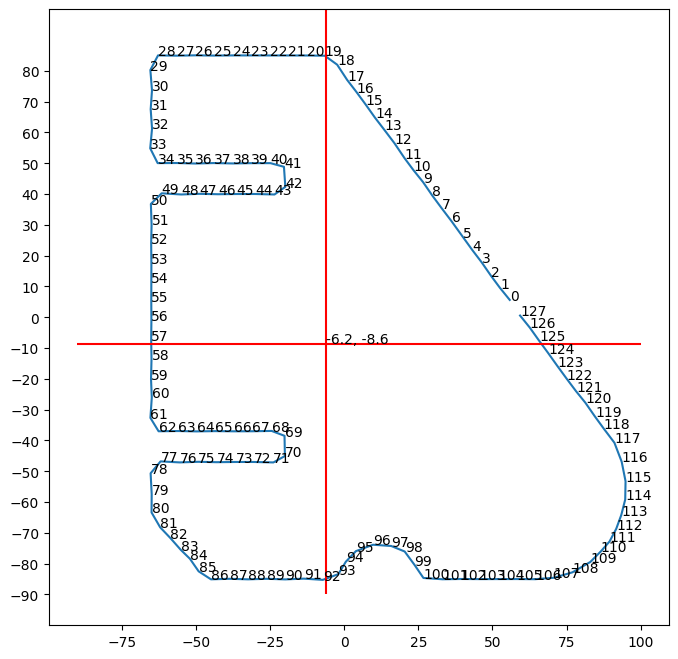

In [205]:
plt.figure(figsize=(8,8))
plt.plot(x, y, xc, yc)
plt.ylim(-100,100)
plt.yticks(np.arange(-90,90,10))
plt.text(xc,yc, '{:.1f}, {:.1f}'.format(xc, yc))
for i in np.arange(0, x.shape[-1], 1): 
    plt.text(x[i], y[i], '{:d}'.format(i))
plt.hlines( yc, -90, 100, 'r')
plt.vlines( xc, -90, 100, 'r')

In [206]:
# Função filtro gauss:
def gaus_filter(n, n_median, sig):
   # n: numero de dados
   #n_median: posição para o vr maximo da curva de Gaus (ex. n/2) 
   #sigma: desvio padrão da gausiana
   gaus_f = np.zeros(n, dtype = complex)   
   for i in np.arange(n):
      gaus_f[i] = (1./(sig*(np.sqrt(2*np.pi))))*np.exp((-1*(i- n_median)**2)/(2*sig**2))
   return gaus_f
 
# Calcula o espectro de energia do vetor transformado antes da gaussina
def total_energy(fft_x):
   real = np.real(fft_x)**2
   imag = np.imag(fft_x)**2
   return (real + imag)

def calc_energy(tf):
    et = np.zeros(tf.shape[0], dtype = np.float64)
    for i in np.arange(tf.shape[0]):
        et[i] = (np.real(tf[i])**2) + (np.imag(tf[i])**2) 
    return et, np.sum(et)

def gaus_smooth_signal (x, sigma):
   n = x.shape[-1]
   gaus_f = gaus_filter(n, n/2, sigma)
   trans_gaus = np.fft.fft(gaus_f)
   trans_x=(np.fft.fft(x))
   trans_x = trans_x * trans_gaus
   itrans_x = np.fft.fftshift(np.fft.ifft(trans_x))
   return (itrans_x, gaus_f) 

# Calcula x'(t),x''(t), y'(t), y''(t), a partir de Fourier:
def derivatives(fft_x, freqs_x):   
   dx =  freqs_x*1j
   dx2 = dx**2
   dF = np.fft.fftshift(np.fft.ifft(fft_x*dx))
   d2F= np.fft.fftshift(np.fft.ifft(fft_x*dx2))
   return ((dF), (d2F))

# Calcula FFT e frequencias  
def fft_freqs(x):
   return (np.fft.fft(x), np.fft.fftfreq(x.shape[-1]))

# Calcula Curvatures
def curvatures(dx, dx2, dy, dy2):
   n= (dx[t]*dy2[t]) - (dy[t]*dx2[t])
   d= ((dx[t]**2) + (dy[t]**2))**(3.0/2)
   return (n/d) 

import math

def rotate(origin, px, py, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

In [208]:
# --- Calc FD 
rt2 = np.zeros(rt.shape[-1])
x2 = np.zeros(rt.shape[-1])
y2 = np.zeros(rt.shape[-1])
for i,j in zip(np.arange(rt.shape[-1]),np.arange(127, -1, -1)):
     x2[i] = x[j]
     y2[i] = y[j] 

xc2 = np.sum(x2)/x2.shape[-1]
yc2 = np.sum(y2)/y2.shape[-1]
rt2 = np.sqrt((x2-xc2)**2 + (y2-yc2)**2)
 

In [209]:
x2i, y2i = rotate((xc2, yc2), x2, y2, angle=(np.sqrt(2)/2))
xc2i = np.sum(x2i)/x2i.shape[-1]
yc2i = np.sum(y2i)/y2i.shape[-1]
rt2i = np.sqrt((x2i-xc2i)**2 + (y2i-yc2i)**2)

In [210]:
l = list(np.arange(100, 128))
l.extend(i for i in np.arange(0, 100))
 
a_x = np.zeros(128) 
a_y = np.zeros(128)


for e in enumerate(l):
    a_x[e[0]] = x2i[e[1]]
    a_y[e[0]] = y2i[e[1]]
a_xc = np.sum(a_x)/a_x.shape[-1]
a_yc = np.sum(a_y)/a_y.shape[-1]
a_rt = np.sqrt((a_x-a_xc)**2 + (a_y- a_yc)**2)


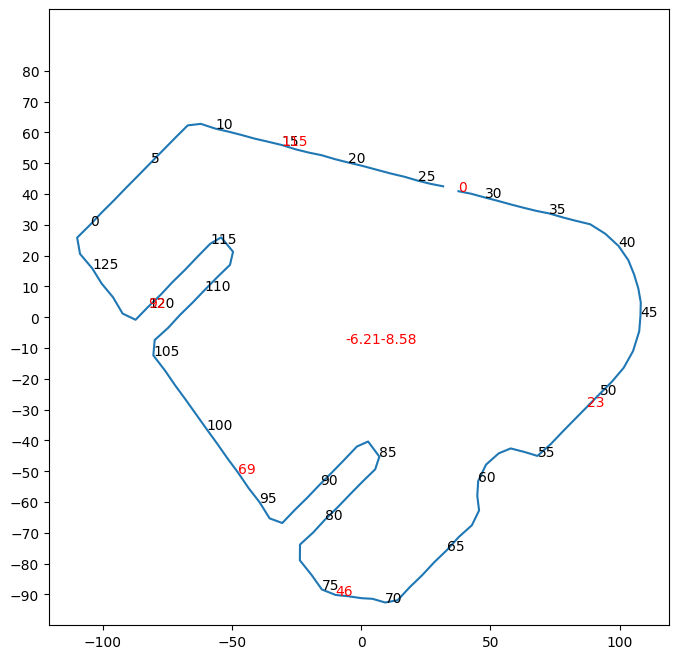

In [211]:
plt.figure(figsize=(8,8))
plt.plot(x2i, y2i)
plt.ylim(-100,100)
plt.yticks(np.arange(-90,90,10))
plt.text(a_xc, a_yc, '{:.2f}{:.2f}'.format(a_xc, a_yc), color='r')
for i in np.arange(0, x.shape[-1], 5): 
    plt.text(a_x[i], a_y[i], '{:d}'.format(i))
 
for i in np.arange(0, x.shape[-1], 23):
    plt.text(x2i[i], y2i[i], '{:d}'.format(i), color='r')
plt.show()
#plt.hlines( a_y, -90, 100, 'r')
#plt.vlines( a_x, -90, 100, 'r')

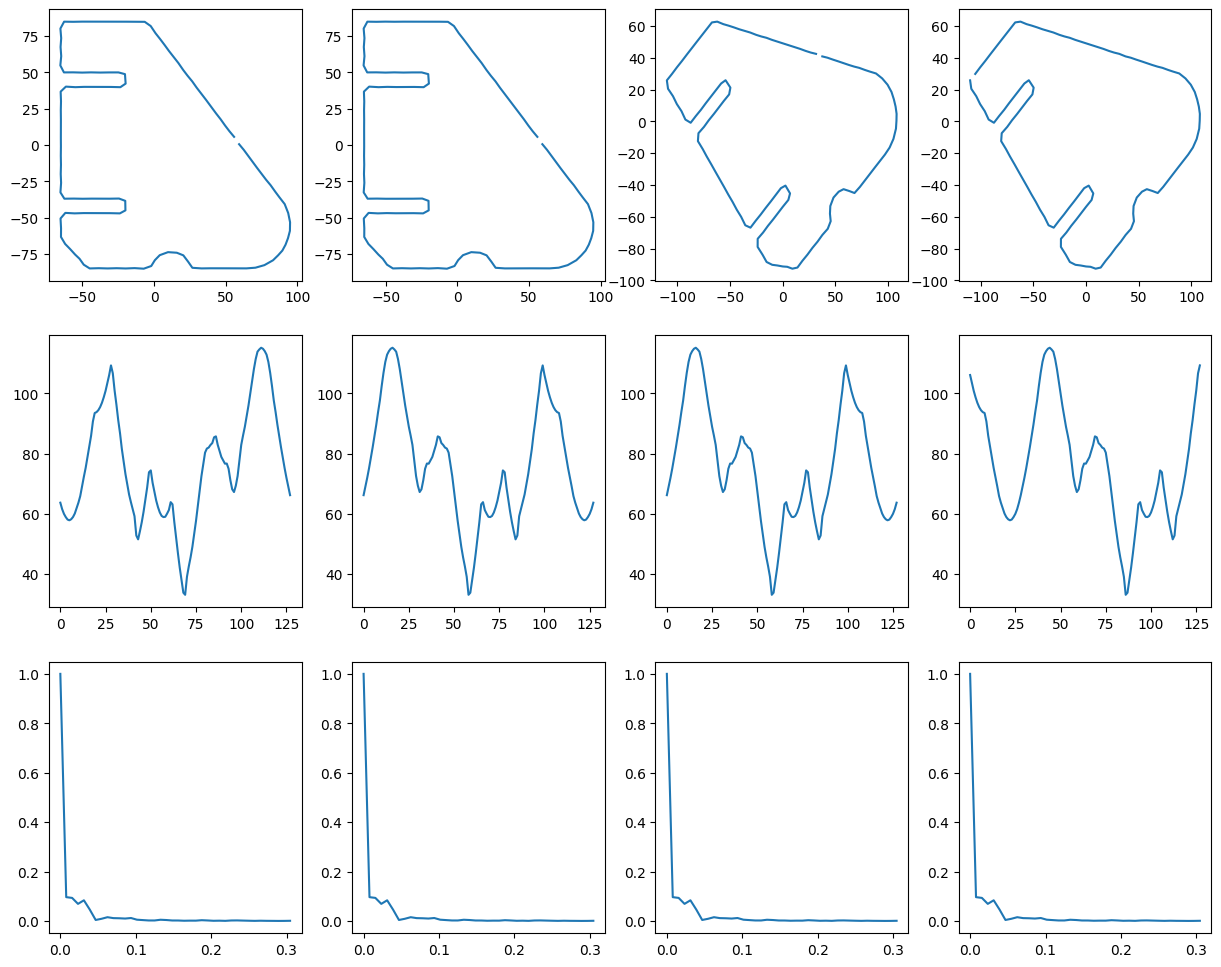

In [218]:
# --- Calc FD 
fft_y, freqs = fft_freqs(rt)
fft_y = fft_y/fft_y[0]

fft_y2, freqs2 = fft_freqs(rt2)
fft_y2 = fft_y2/fft_y2[0]

fft_y2i, freqs2i = fft_freqs(rt2i)
fft_y2i = fft_y2i/fft_y2i[0]

fft_ya, freqsa = fft_freqs(a_rt)
fft_ya = fft_ya/fft_ya[0]

fig, axis = plt.subplots(3, 4, figsize=(15,12))
axis[0,0].plot(x, y) 
axis[0,1].plot(x2, y2)  
axis[0,2].plot(x2i, y2i) 
axis[0,3].plot(a_x, a_y)

axis[1,0].plot(np.arange(128), rt)
axis[1,1].plot(np.arange(128), rt2)
axis[1,2].plot(np.arange(128), rt2i)
axis[1,3].plot(np.arange(128), a_rt)

axis[2,0].plot(freqs[0:40], (np.sqrt((np.real(fft_y))**2 + (np.imag(fft_y))**2))[0:40]) 
axis[2,1].plot(freqs2[0:40], np.sqrt((np.real(fft_y2))**2 + (np.imag(fft_y2))**2)[0:40])  
axis[2,2].plot(freqs2i[0:40], np.sqrt((np.real(fft_y2i))**2 + (np.imag(fft_y2i))**2)[0:40]) 
axis[2,3].plot(freqsa[0:40], np.sqrt((np.real(fft_ya))**2 + (np.imag(fft_ya))**2)[0:40])
plt.show()

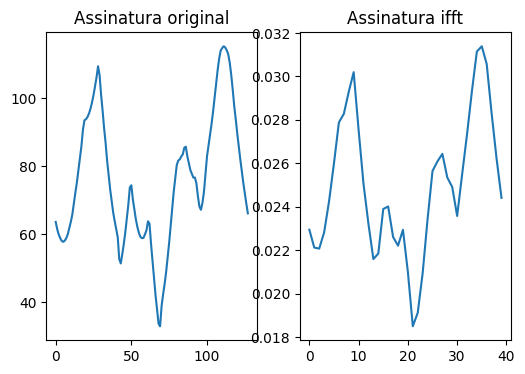

In [219]:
fig, axis = plt.subplots(1, 4, figsize=(6,4))
axis[0].plot(np.arange(128), rt )
axis[0].set( title = 'Assinatura original') 

axis[1].plot(np.arange(128)[0:40], np.fft.ifft(fft_y[0:40]))
axis[1].set( title = 'Assinatura ifft') 

axis[2].plot((xc+rt), (yc+rt) )
axis[2].set( title = 'Assinatura original') 

axis[3].plot(np.arange(128)[0:40], np.fft.ifft(fft_y[0:40]))
axis[3].set( title = 'Assinatura ifft') 
plt.show()